Understanding the Data

In [257]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [259]:
data=pd.read_csv("bank.csv")

In [261]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes
5,42,management,single,tertiary,no,0.0,yes,yes,unknown,5.0,may,562.0,2,-1.0,0,unknown,yes
6,56,management,married,tertiary,no,830.0,yes,yes,unknown,6.0,may,1201.0,1,-1.0,0,unknown,yes
7,60,retired,divorced,secondary,no,545.0,yes,no,unknown,6.0,may,1030.0,1,-1.0,0,unknown,yes
8,39,technician,single,unknown,no,45248.0,yes,no,unknown,6.0,may,1623.0,1,-1.0,0,unknown,yes
9,37,technician,married,secondary,no,1.0,yes,no,unknown,6.0,may,608.0,1,-1.0,0,unknown,yes


In [263]:
data.shape

(10861, 17)

In [265]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10861.000000,10855.000000,10860.000000,10841.000000,10861.000000,10842.000000,10861.000000
mean,40.323727,1457.746476,17.887937,386.267687,2.442593,33.002859,0.569929
std,11.969443,3077.475009,7.846315,345.403995,2.662568,90.004568,1.875257
min,18.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,13.000000,156.000000,1.000000,-1.000000,0.000000
50%,38.000000,524.000000,18.000000,268.000000,2.000000,-1.000000,0.000000
75%,47.000000,1633.000000,26.000000,507.000000,3.000000,-1.000000,0.000000
max,334.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10861 non-null  int64  
 1   job        10846 non-null  object 
 2   marital    10861 non-null  object 
 3   education  10852 non-null  object 
 4   default    10861 non-null  object 
 5   balance    10855 non-null  float64
 6   housing    10861 non-null  object 
 7   loan       10858 non-null  object 
 8   contact    10850 non-null  object 
 9   day        10860 non-null  float64
 10  month      10861 non-null  object 
 11  duration   10841 non-null  float64
 12  campaign   10861 non-null  int64  
 13  pdays      10842 non-null  float64
 14  previous   10861 non-null  int64  
 15  poutcome   10861 non-null  object 
 16  y          10861 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.4+ MB


Data Cleaning


In [269]:
data.isnull().sum()

age           0
job          15
marital       0
education     9
default       0
balance       6
housing       0
loan          3
contact      11
day           1
month         0
duration     20
campaign      0
pdays        19
previous      0
poutcome      0
y             0
dtype: int64

In [271]:
data.replace(' ', np.nan, inplace=True)
data.dropna(inplace=True)

In [112]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [98]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [100]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes


In [104]:
data.shape

(10787, 17)

**EDA**

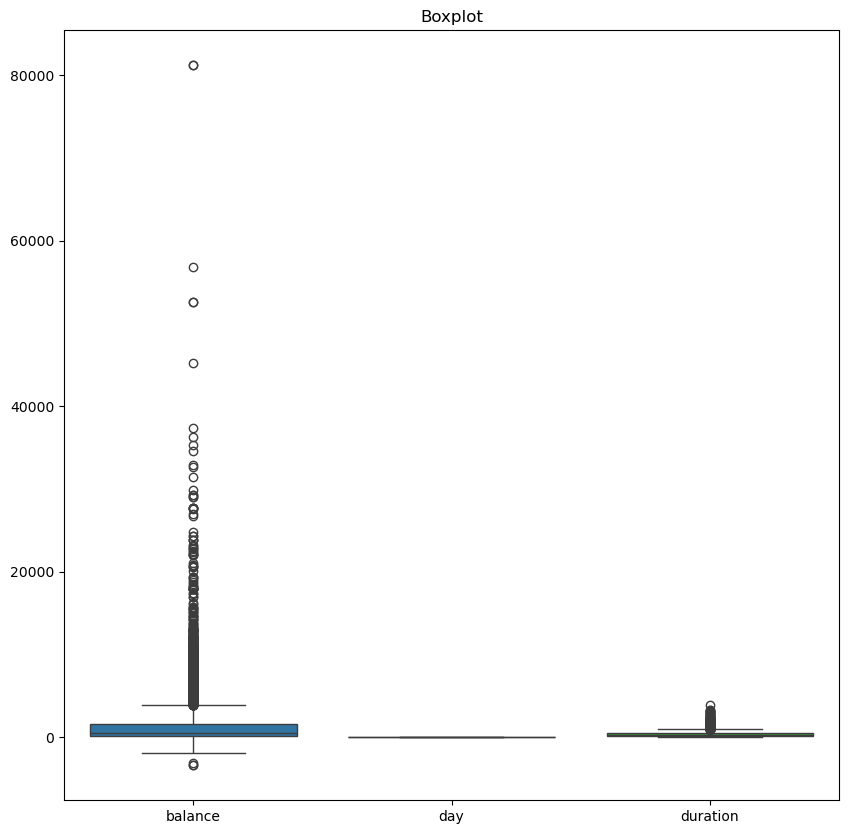

In [273]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data[['balance','day','duration']])
plt.title("Boxplot")
plt.show()

In [275]:

Q1 = data.balance.quantile(0.25)
Q3 = data.balance.quantile(0.75)
IQR = Q3 - Q1
data= data[~((data.balance < (Q1 - 1.5 * IQR)) | (data.balance > (Q3 + 1.5 * IQR)))]

In [277]:

Q1 = data.duration.quantile(0.25)
Q3 = data.duration.quantile(0.75)
IQR = Q3 - Q1
data= data[~((data.balance < (Q1 - 1.5 * IQR)) | (data.balance > (Q3 + 1.5 * IQR)))]

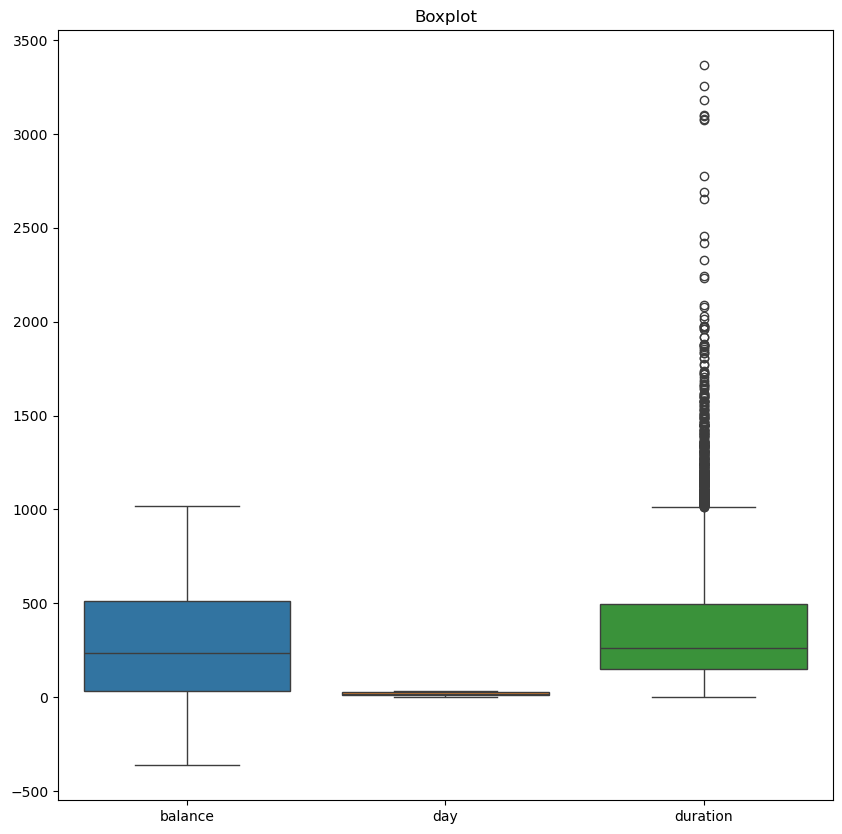

In [279]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data[['balance','day','duration']])
plt.title("Boxplot")
plt.show()

correlation analysis

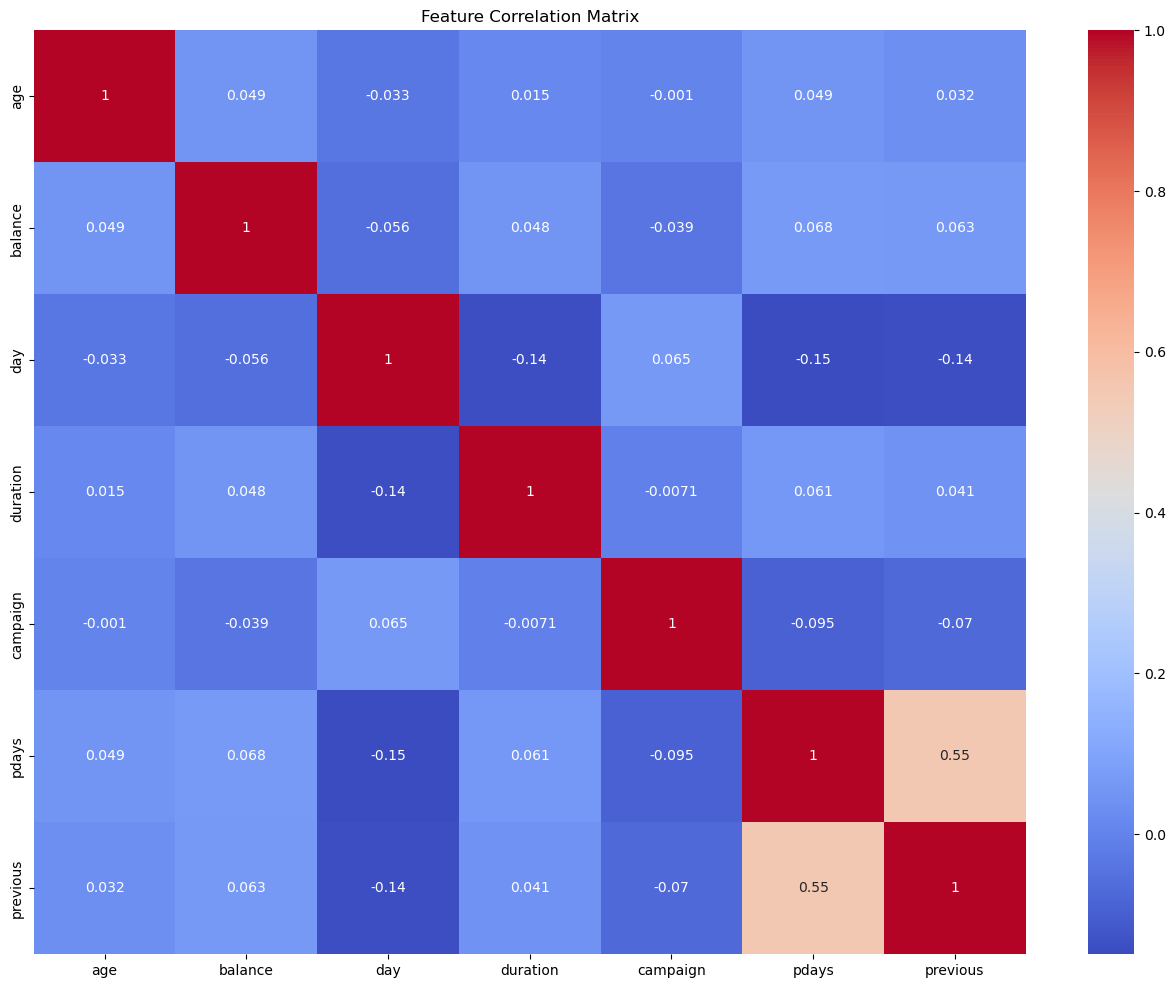

In [281]:
numeric_data = data.select_dtypes(include=['number'])  
plt.figure(figsize=(16, 12))
corr_matrix = numeric_data.corr() 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

Since in the correlation matrix there is no numeric columns with strong correlation.Thus no need of reducing the features of the dataset.


**Data Preprocessing**

In [283]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [285]:
scaler = StandardScaler()
numerical_column = ['age', 'balance','day','duration','campaign','pdays','previous']
data[numerical_column] = scaler.fit_transform(data[numerical_column])

In [287]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,1.448125,admin.,married,secondary,no,-0.786304,no,no,unknown,-1.669532,may,3.161466,-0.549837,-0.351421,-0.282107,unknown,yes
4,1.276729,admin.,married,tertiary,no,-0.346808,no,no,unknown,-1.669532,may,0.855390,-0.185085,-0.351421,-0.282107,unknown,yes
5,0.248349,management,single,tertiary,no,-0.928586,yes,yes,unknown,-1.669532,may,0.533004,-0.185085,-0.351421,-0.282107,unknown,yes
6,1.448125,management,married,tertiary,no,1.695738,yes,yes,unknown,-1.540412,may,2.388901,-0.549837,-0.351421,-0.282107,unknown,yes
7,1.790918,retired,divorced,secondary,no,0.794615,yes,no,unknown,-1.540412,may,1.892253,-0.549837,-0.351421,-0.282107,unknown,yes


In [303]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [305]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,1.448125,0,1,1,0,-0.786304,0,0,2,-1.669532,8,3.161466,-0.549837,-0.351421,-0.282107,3,1
4,1.276729,0,1,2,0,-0.346808,0,0,2,-1.669532,8,0.855390,-0.185085,-0.351421,-0.282107,3,1
5,0.248349,4,2,2,0,-0.928586,1,1,2,-1.669532,8,0.533004,-0.185085,-0.351421,-0.282107,3,1
6,1.448125,4,1,2,0,1.695738,1,1,2,-1.540412,8,2.388901,-0.549837,-0.351421,-0.282107,3,1
7,1.790918,5,0,1,0,0.794615,1,0,2,-1.540412,8,1.892253,-0.549837,-0.351421,-0.282107,3,1


**Model Evaluation and Building**

In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [309]:
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [311]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [215]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} ")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

Logistic Regression 
Accuracy: 0.9715
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1089
           1       0.99      0.94      0.97       908

    accuracy                           0.97      1997
   macro avg       0.97      0.97      0.97      1997
weighted avg       0.97      0.97      0.97      1997

Decision Tree 
Accuracy: 0.9790
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1089
           1       0.99      0.96      0.98       908

    accuracy                           0.98      1997
   macro avg       0.98      0.98      0.98      1997
weighted avg       0.98      0.98      0.98      1997

Random Forest 
Accuracy: 0.9770
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1089
           1       1.00      0.95      0.97       908

    accuracy                           0.98      1997
   macro avg       0.98   

From the above evaluations. We can see that Random Forest model has the better accuracy score and also precision.
so we chose Random Forest for our prediction model.

**Hyperparameter Tuning**


In [313]:
best_model = models['Random Forest']

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, scoring='f1')
grid_search.fit(X_train, y_train)


In [ ]:
print("Best Parameters:", grid_search.best_params_)

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)
print("after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

**fianl model**

In [ ]:
import pickle as pk
with open('best_model.pkl', 'wb') as f:
    pk.dump(grid_search.best_estimator_, f)